# GloFAS historical

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import climetlab as cml
import xarray as xr
from climetlab_cems_flood.utils import get_po_basin
from matplotlib import pyplot as plt

In [3]:
import pandas as pd 

In [4]:
from collections.abc import Iterable

In [5]:
gdf = get_po_basin().dissolve()

ERROR 1: PROJ: proj_create_from_database: Open of /home/iacopo/.local/build/mambaforge/envs/cems/share/proj failed


In [6]:
# pontelagoscuro
ps = {'name':'pontelagoscuro','lat':44.886111, 'lon':11.604444}
cm = {'name':'casale-monferrato','lat':45.142222, 'lon':8.447500} # casale monferrato po
ca = {'name':'canonica-dadda', 'lat':45.576944, 'lon':9.534722} # canonica d'adda
rhine = {'name':'rhine', 'area':[50.972204,5.450796, 46.296530, 11.871059]} # Ryne
rhine2 = {'name':'rhine2', 'area':[50.972204,5.450796, 46.296530, 11.871059]} # Ryne
rhine3 = {'name':'rhine3', 'area':[50.972204,5.450796, 46.296530, 11.871059]} # Ryne

In [11]:
hist = cml.load_dataset(
            'glofas-historical',
            model='lisflood',
            product_type='consolidated',
            system_version='version_3_1',
            temporal_filter= '2020-2021 * *',
            variable="river_discharge_in_the_last_24_hours",
            coords=[ps,cm,ca],
            #area= [rhine,rhine2, rhine3],
            split_on = ['coords',('hyear',1)],
            threads = 6,
            merger=None
        )

{'system_version': 'version_3_1', 'hydrological_model': 'lisflood', 'product_type': 'consolidated', 'variable': 'river_discharge_in_the_last_24_hours', 'hyear': ['2020', '2021'], 'hmonth': ['january', 'february', 'march', 'april', 'may', 'june', 'july', 'august', 'september', 'october', 'november', 'december'], 'hday': ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31'], 'format': 'grib', 'area': [[44.886111, 11.604444, 44.886111, 11.604444], [45.142222, 8.4475, 45.142222, 8.4475], [45.576944, 9.534722, 45.576944, 9.534722]]}
['pontelagoscuro', 'casale-monferrato', 'canonica-dadda']


  0%|                                                     | 0/6 [00:00<?, ?it/s]2022-12-28 13:41:54,670 INFO Welcome to the CDS
2022-12-28 13:41:54,671 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-28 13:41:54,788 INFO Welcome to the CDS
2022-12-28 13:41:54,788 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-28 13:41:54,811 INFO Request is queued
2022-12-28 13:41:54,831 INFO Request is queued
2022-12-28 13:41:54,843 INFO Welcome to the CDS
2022-12-28 13:41:54,844 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-28 13:41:54,874 INFO Request is queued
2022-12-28 13:41:54,994 INFO Welcome to the CDS
2022-12-28 13:41:54,995 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/cems-glofas-historical
2022-12-28 13:41:55,027 INFO Request is queued
2022-12-28 13:41:55,145 INFO Welcome to the CDS
2022

In [12]:
hist.to_netcdf('/data/temp/nc', 'test')

In [12]:
from pathlib import Path
fp = Path("/data/temp/nc").glob("*.nc")

In [13]:
ds = xr.open_mfdataset(fp)#, combine='nested', concat_dim="station")

In [25]:
ds.station

<xarray.DataArray 'station' (station: 3)>
array(['points_glofas-historical_area-canonica-dadda',
       'points_glofas-historical_area-casale-monferrato',
       'points_glofas-historical_area-pontelagoscuro'], dtype=object)
Coordinates:
  * station  (station) object 'points_glofas-historical_area-canonica-dadda' ...

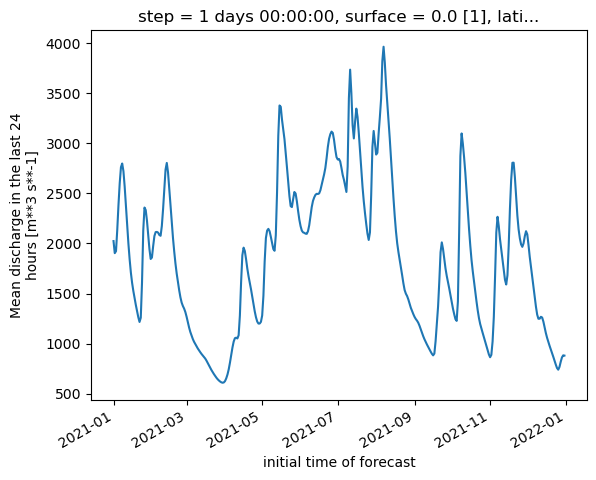

In [27]:
hist.source.indexes[1].to_xarray().isel(step=0,surface=0,latitude=1,longitude=1).dis24.plot()

In [54]:
for i,f in enumerate(fp):
    ff = f.stem.split('_')[-1]
    ff = ff.replace('-','_')
    print(ff)
    exec(f"{ff}=xr.open_dataset(f)")

area_pontelagoscuro
area_casale_monferrato
area_canonica_dadda


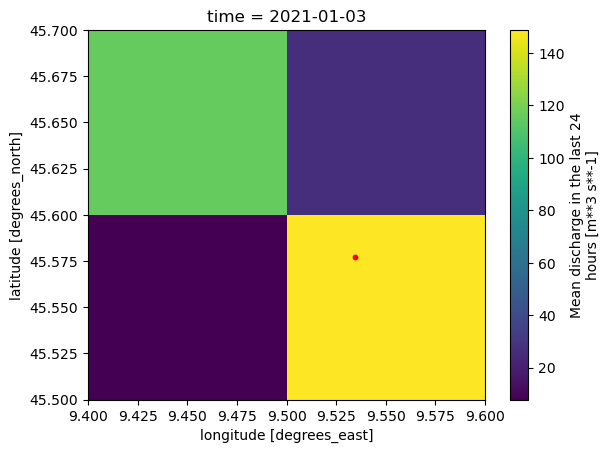

In [60]:
fig, ax = plt.subplots()
qm = area_canonica_dadda.isel(time=2).dis24.plot.pcolormesh(ax=ax)
ax.scatter(ca['lon'], ca['lat'],c="red",s=10)

In [66]:
def show_station(ns=10):
    

In [27]:
dataset = hist.to_xarray()

AssertionError: Not all GRIB fields were converted to xarray (1095 GRIBs > 365 2D-field(s) in xarray)

<xarray.Dataset>
Dimensions:    (time: 365, latitude: 49, longitude: 66)
Coordinates:
  * time       (time) datetime64[ns] 2021-01-01 2021-01-02 ... 2021-12-31
  * latitude   (latitude) float64 51.05 50.95 50.85 50.75 ... 46.45 46.35 46.25
  * longitude  (longitude) float64 5.45 5.55 5.65 5.75 ... 11.75 11.85 11.95
Data variables:
    dis24      (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-12-27T11:21 GRIB to CDM+CF via cfgrib-0.9.1...

In [18]:
dataset.dis24.latitude.values,dataset.dis24.longitude.values

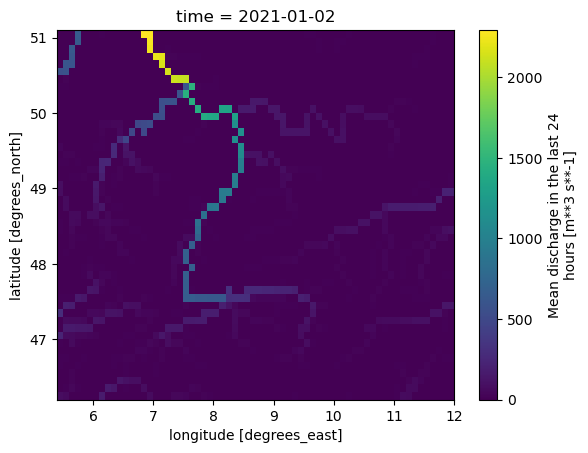

In [21]:
dataset.dis24.isel(time=1).plot()

In [19]:
dataset.dis24.plot(row='latitude', col='longitude')

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x7f3ce2c8ef80> (for post_execute):



KeyboardInterrupt



Error in callback <function flush_figures at 0x7f3ce2ca3370> (for post_execute):



KeyboardInterrupt



In [49]:
dataset.isel(time=13).dis24.values

array([[162.15625 , 182.70312 ],
       [  2.28125 ,   5.203125]], dtype=float32)